In [57]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, solve

In [4]:
# def g(x,gamma):
#     g = np.prod(1 + (2 * np.pi**2)* gamma * (x * (x-1)+1/6), axis = 1)
#     return g

def p_alpha(x, gamma):
    g = np.prod(1 + (2 * np.pi**2)* gamma * (x * (x-1)+1/6), axis = 1)
    return np.mean(g)-1

def p_alpha_n(lattice,m_max,gamma):
    x = lattice.gen_samples(2**m_max)
    p_alpha_vec = np.zeros(1)
    for ii in range(m_max):
        p_alpha_vec = np.append(p_alpha_vec, p_alpha_vec + (2**ii) * p_alpha(x[:2**ii],gamma))
    p_alpha_vec = p_alpha_vec[1:]/np.arange(1,2**m_max)
    return p_alpha_vec


In [5]:
d = 2
sampler = qp.Lattice(d,randomize=False)
gamma = np.array([0.1, 0.05])
m_max = 10
print(p_alpha(sampler.gen_samples(4),gamma))
#print(p_alpha_n(sampler,m_max,gamma))

p_alpha_values = p_alpha_n(sampler,m_max,gamma)

0.04817659679330921


/Users/laramatiukha/Documents/GitHub/QMCSoftware/qmcpy/discrete_distribution/lattice/lattice.py:250


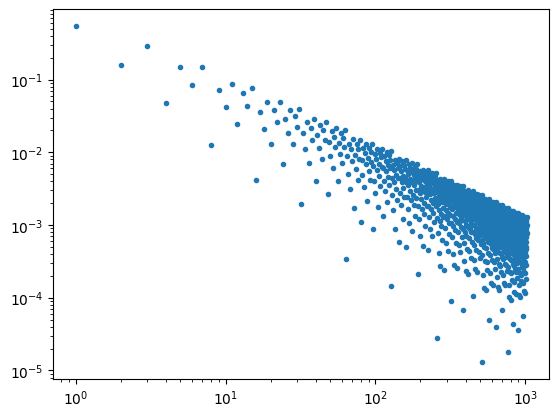

In [6]:

plt.loglog(np.arange(1,2**m_max), p_alpha_values, '.')

# lambdas = [3, 5, 7]
# colors = ['r', 'lime', 'darkviolet']


In [ ]:
# P_4 ?
# B_4 = x^4 - 2x^3 + x^2 - 1/30

In [25]:
def GramMat(x=None, coordwts=None):
    if x is None:
        x = np.array([[0, 0], [0.5, 0.5], [0.25, 0.25]])
    if coordwts is None:
        coordwts = (np.arange(1, 51, dtype=float))**-2  
    
    n, d = x.shape
    coordwts = coordwts[:d]  
    
    xmat = np.mod(x[:, np.newaxis, :] - x[np.newaxis, :, :], 1)
    K = np.prod(1 + 0.5 * coordwts[np.newaxis, np.newaxis, :] * (xmat * (xmat - 1) + 1/6), axis=2)
    
    return K


K = GramMat()
print(K)


[[1.10590278 0.94835069 0.98700629]
 [0.94835069 1.10590278 0.98700629]
 [0.98700629 0.98700629 1.10590278]]


In [204]:
def discrepancy(n=2**8, d=2, coordwts=(np.arange(1, 51, dtype=float)) ** -2):
    
    optfwtsall = np.zeros((n, n))
    ssdiscopt[-1] = 0
    ssdisc[-1] = 0
    
    xlat = qp.Lattice(d).gen_samples(n)
    kernellat = GramMat(xlat, coordwts)
    
    for m in range(1, n + 1):
        K = kernellat[:m, :m]
         
        preoptfwts = inv(K) @ np.ones((m, 1))

        optfwts = preoptfwts / (np.ones((1, m)) @ preoptfwts)
        optfwtsall[:m, m - 1] = optfwts.flatten()
        
        ssdiscopt[m - 1] = 1 - 2 * np.sum(optfwts) + optfwts.T @ K @ optfwts
        ssdisc[m - 1] = -1 + np.ones((1, m)) @ K @ np.ones((m, 1)) / m**2
    
    return ssdiscopt, ssdisc, xlat, optfwtsall

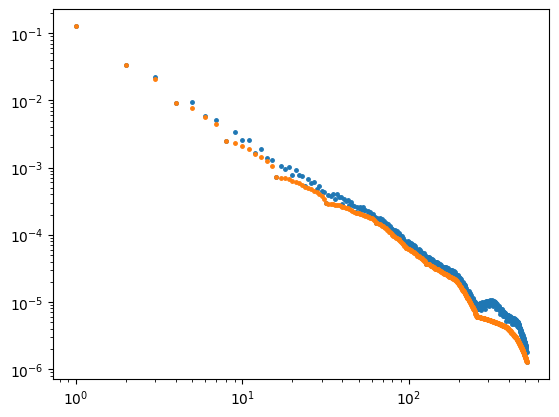

In [205]:
n = 512
d = 6

coordwts = (np.arange(1, 51, dtype=float)) ** -2
ssdiscopt, ssdisc, xlat, optfwts = discrepancy(n,d,coordwts)

plt.figure()
plt.loglog(np.arange(1, n + 1), ssdisc, '.', markersize=5)
plt.loglog(np.arange(1, n + 1), ssdiscopt, '.', markersize=5)
plt.show()

In [263]:
def compute_ratios(n, d, coordwts,start,end):
    
    ssdiscopt, ssdisc, _, _ = discrepancy(n, d, coordwts)

    if start == 2**6:
        x_values = list(range(2**6, 2**7))
    else:
        x_values = list(range(2**6+1,2**7+1))
    #x_values = list(range(2**6, 2**7 + 1))  
    ratios_ssdisc = []
    # ratios_ssdiscopt = []
    for n in x_values:
        if end < 2**7:
            ratio_ssdisc = ssdisc[n] / ssdisc[2**6]  
            # ratio_ssdiscopt = ssdiscopt[n]/ ssdiscopt[2**6]
        else:
            ratio_ssdisc = ssdisc[n] / ssdisc[2**7]  
            # ratio_ssdiscopt = ssdiscopt[n]/ ssdiscopt[2**7]

        ratios_ssdisc.append(ratio_ssdisc)
        # ratios_ssdiscopt.append(ratio_ssdiscopt)

    return x_values, ratios_ssdisc

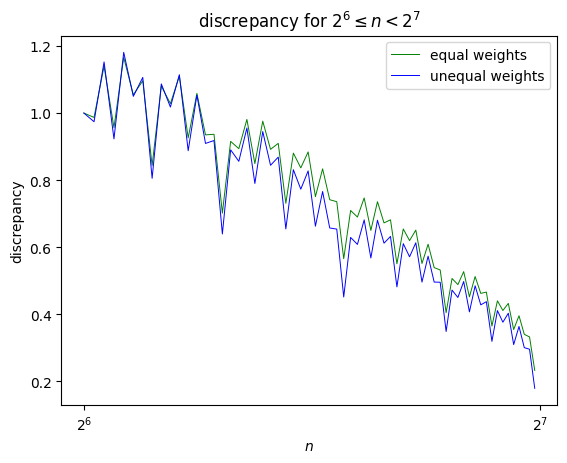

In [264]:
n = 2**7
d = 2 

coordweights_eq = np.ones(51)
x_vals, ratios_eq_w = compute_ratios(n, d, coordweights_eq,2**6,2**7-1)

coordweights_uneq = (np.arange(1, 51, dtype=float)) ** -2
_, ratios_uneq_w = compute_ratios(n, d, coordweights_uneq,2**6,2**7-1)

plt.plot(x_vals, ratios_eq_w, color='g', label='equal weights', linewidth=0.7)
plt.plot(x_vals, ratios_uneq_w, color='b', label='unequal weights', linewidth=0.7)
plt.xscale('log', base=2)
plt.title(r'discrepancy for $2^6 \leq n < 2^7$')
plt.xlabel(r'$n$')
plt.ylabel('discrepancy')  
plt.legend()
plt.show()

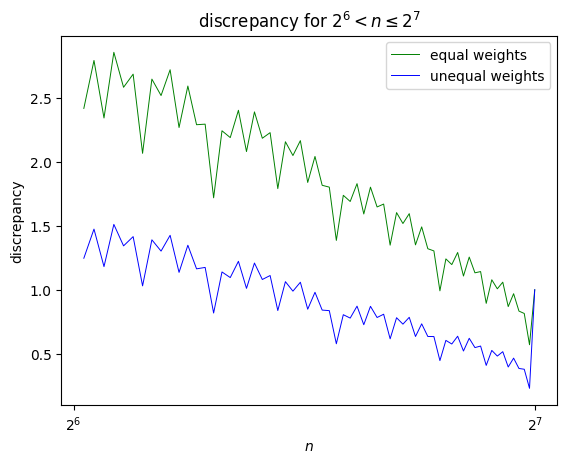

In [249]:
n = 2**7
d = 2 

coordweights_eq = np.ones(51)
x_vals, ratios_eq_w = compute_ratios(n, d, coordweights_eq,2**6+1,2**7+1)

coordweights_uneq = (np.arange(1, 51, dtype=float)) ** -2
_, ratios_uneq_w = compute_ratios(n, d, coordweights_uneq,2**6+1,2**7+1)

plt.plot(x_vals, ratios_eq_w, color='g', label='equal weights', linewidth=0.7)
plt.plot(x_vals, ratios_uneq_w, color='b', label='unequal weights', linewidth=0.7)
plt.title(r'discrepancy for $2^6 < n \leq 2^7$')
plt.xscale('log', base=2)
plt.xlabel(r'$n$')
plt.ylabel('discrepancy')  
plt.legend()
plt.show()